download dataset

import libraries

In [ ]:
import numpy as nP
import pandas as pd
import keras

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM,Activation,Dense,Dropout,Input,Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical



read dataset and preprocessing

In [ ]:
df=pd.read_csv('spam.csv',delimiter=',',encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)

In [ ]:
df.shape

(5572, 2)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'number of ham and spam messages')

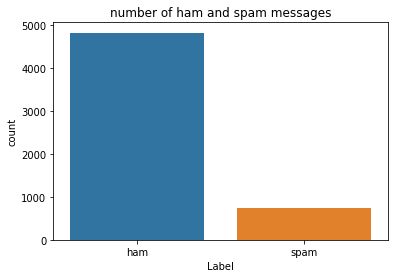

In [ ]:
sns.countplot(df.v1)
plt.xlabel('Label')
plt.title('number of ham and spam messages')

In [ ]:
X=df.v2
Y=df.v1
le=LabelEncoder()
Y=le.fit_transform(Y)
Y=Y.reshape(-1,1)

train test split

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20)

In [ ]:
from os import XATTR_CREATE
max_words=1000
max_len=150
tok=Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences=tok.texts_to_sequences(X_train)
sequences_matrix=keras.utils.pad_sequences(sequences,maxlen=max_len)

create lstm model

add layers

In [ ]:
inputs=Input(name='inputs',shape=[max_len])
layer=Embedding(max_words,50,input_length=max_len)(inputs)
layer=LSTM(64)(layer)
layer=Dense(256,name='FC')(layer)
layer=Activation('relu')(layer)
layer=Dropout(0.5)(layer)
layer=Dense(1,name='out_layer')(layer)
layer=Activation('sigmoid')(layer)
model=Model(inputs=inputs,outputs=layer)

compile the model


In [ ]:
model.summary()
model.compile(loss='binary_crossentropy' ,optimizer=RMSprop(),metrics=['accuracy'])

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 150)]             0         
                                                                 
 embedding_6 (Embedding)     (None, 150, 50)           50000     
                                                                 
 lstm_6 (LSTM)               (None, 64)                29440     
                                                                 
 FC (Dense)                  (None, 256)               16640     
                                                                 
 activation_1 (Activation)   (None, 256)               0         
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 out_layer (Dense)           (None, 1)                 257   

save the model

In [ ]:
model.save('spam_lstm_model.h5')

test the model

In [ ]:
test_sequences=tok.texts_to_sequences(X_test)
test_sequences_matrix=keras.utils.pad_sequences(test_sequences,maxlen=max_len)

In [ ]:
accr=model.evaluate ( test_sequences_matrix,Y_test)
print('Test set\n Loss: {:0.3f}\n Accuracy: {:0.3f}'.format (accr[0], accr[1]))

35/35 [==============================] - 2s 23ms/step - loss: 0.6918 - accuracy: 0.7327
Test set
 Loss: 0.692
 Accuracy: 0.733
